In [1]:
import multiprocessing as mp
import numpy as np
import pandas as pd
import random
import string

In [2]:
# Define an output queue
output = mp.Queue()

# define a example function
def rand_string(length, output):
    """ Generates a random string of numbers, lower- and uppercase chars. """
    rand_str = ''.join(random.choice(
                    string.ascii_lowercase
                    + string.ascii_uppercase
                    + string.digits)
               for i in range(length))
    output.put(rand_str)

# Setup a list of processes that we want to run
processes = [mp.Process(target=rand_string, args=(5, output)) for x in range(4)]

# Run processes
for p in processes:
    p.start()

# Exit the completed processes
for p in processes:
    p.join()

# Get process results from the output queue
results = [output.get() for p in processes]

print(results)

['balWk', 'bTAW6', 'yi866', 'wDvCw']


In [3]:
import pandas as pd
import time


LARGE_FILE = "/Users/taweewat/Documents/xray_project/radio/nvss_fff.txt"
CHUNKSIZE = 10000 # processing 100,000 rows at a time

def process_frame(df):
        # process data frame
        return len(df)

if __name__ == '__main__':
        tic = time.clock()
        reader = pd.read_table(LARGE_FILE, chunksize=CHUNKSIZE)

        result = 0
        for df in reader:
                # process each data frame
                result += process_frame(df)

        print "There are %d rows of data"%(result)
        toc = time.clock()
        print toc - tic

There are 3536647 rows of data
2.208002


In [4]:
import pandas as pd
import multiprocessing as mp
import time

LARGE_FILE = "/Users/taweewat/Documents/xray_project/radio/nvss_fff.txt"
CHUNKSIZE = 1000 # processing 100,000 rows at a time

def process_frame(df):
        # process data frame
        return len(df)

if __name__ == '__main__':
        tic = time.clock()
        reader = pd.read_table(LARGE_FILE, chunksize=CHUNKSIZE)
        pool = mp.Pool(4) # use 4 processes

        funclist = []
        for df in reader:
                # process each data frame
                f = pool.apply_async(process_frame,[df])
                funclist.append(f)

        result = 0
        for f in funclist:
                result += f.get(timeout=10) # timeout in 10 seconds

        print "There are %d rows of data"%(result)
        toc = time.clock()
        print toc - tic

There are 3536647 rows of data
6.490968


In [32]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],\
                'B' : ['one', 'one', 'two', 'three',\
                       'two', 'two', 'one', 'three'],\
                'C' : np.random.randn(8), 'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.926418,1.261932
1,bar,one,1.901087,0.261098
2,foo,two,-0.021960,0.096088
3,bar,three,1.852861,-0.351138
4,foo,two,1.097899,0.290242
5,bar,two,-1.645873,0.164221
6,foo,one,0.216807,0.124473
7,foo,three,1.161284,0.164064


In [37]:
for i in df.groupby(level=0):
    print i

(0,      A    B         C         D
0  foo  one  0.926418  1.261932)
(1,      A    B         C         D
1  bar  one  1.901087  0.261098)
(2,      A    B        C         D
2  foo  two -0.02196  0.096088)
(3,      A      B         C         D
3  bar  three  1.852861 -0.351138)
(4,      A    B         C         D
4  foo  two  1.097899  0.290242)
(5,      A    B         C         D
5  bar  two -1.645873  0.164221)
(6,      A    B         C         D
6  foo  one  0.216807  0.124473)
(7,      A      B         C         D
7  foo  three  1.161284  0.164064)


In [35]:
p = mp.Pool(processes=8)
split_dfs = np.array_split(df, 8, axis=0)
df_pool_results = p.map(process, split_dfs)

In [38]:
split_dfs

[     A    B         C         D
 0  foo  one  0.926418  1.261932,      A    B         C         D
 1  bar  one  1.901087  0.261098,      A    B        C         D
 2  foo  two -0.02196  0.096088,      A      B         C         D
 3  bar  three  1.852861 -0.351138,      A    B         C         D
 4  foo  two  1.097899  0.290242,      A    B         C         D
 5  bar  two -1.645873  0.164221,      A    B         C         D
 6  foo  one  0.216807  0.124473,      A      B         C         D
 7  foo  three  1.161284  0.164064]

# Mpld3
- http://mpld3.github.io/

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3

mpld3.enable_notebook()

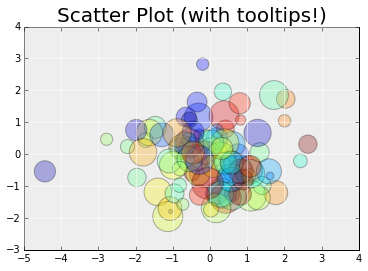

In [7]:
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
N = 100

scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s=1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)
ax.grid(color='white', linestyle='solid')

ax.set_title("Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
tooltip = mpld3.plugins.PointLabelTooltip(scatter, labels=labels)
mpld3.plugins.connect(fig, tooltip)

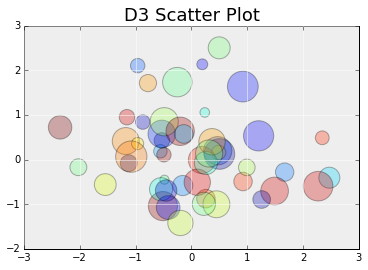

In [6]:
fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot", size=18);

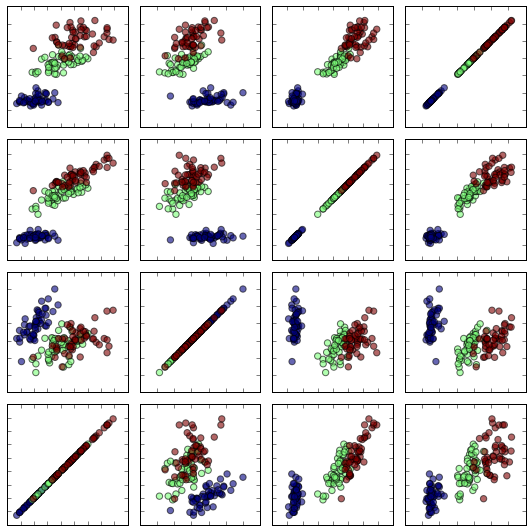

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

import mpld3
from mpld3 import plugins, utils


data = load_iris()
X = data.data
y = data.target

# dither the data for clearer plotting
X += 0.1 * np.random.random(X.shape)

fig, ax = plt.subplots(4, 4, sharex="col", sharey="row", figsize=(8, 8))
fig.subplots_adjust(left=0.05, right=0.95, bottom=0.05, top=0.95,
                    hspace=0.1, wspace=0.1)

for i in range(4):
    for j in range(4):
        points = ax[3 - i, j].scatter(X[:, j], X[:, i],
                                      c=y, s=40, alpha=0.6)

# remove tick labels
for axi in ax.flat:
    for axis in [axi.xaxis, axi.yaxis]:
        axis.set_major_formatter(plt.NullFormatter())

# Here we connect the linked brush plugin
plugins.connect(fig, plugins.LinkedBrush(points))


In [55]:
points

In [8]:
X[:,0]

array([ 5.10802997,  4.94178035,  4.70781115,  4.60438025,  5.0909446 ,
        5.44613461,  4.69727011,  5.09952452,  4.42352371,  4.99507882,
        5.45971148,  4.87520347,  4.87060916,  4.37325253,  5.86217389,
        5.76927786,  5.40584497,  5.10042631,  5.77872511,  5.1117378 ,
        5.43905443,  5.19604184,  4.6739562 ,  5.18141554,  4.84972885,
        5.0718979 ,  5.0805848 ,  5.25250985,  5.26860828,  4.79792652,
        4.8694123 ,  5.41496943,  5.21172633,  5.55080441,  4.92506351,
        5.09955734,  5.53637876,  4.94138522,  4.46421393,  5.12331743,
        5.00805743,  4.52813855,  4.48619969,  5.05852378,  5.17182184,
        4.81806849,  5.14396028,  4.67569485,  5.35497279,  5.04720355,
        7.03914808,  6.44138991,  6.9897732 ,  5.54554049,  6.56876185,
        5.70836647,  6.33437157,  4.91898677,  6.64320163,  5.24486239,
        5.00334568,  5.94062189,  6.06510626,  6.11248426,  5.69685594,
        6.7204518 ,  5.63540713,  5.88082687,  6.25529474,  5.69